In [26]:
#All the imports for the notebook can be found here 
import pandas as pd
import os
# import folium
import numpy as np
import matplotlib as mplt
import matplotlib.pyplot as plt
# import geopandas
import seaborn as sns
# from shapely.geometry import Point
# import gmplot

In [27]:
#imports for feature selection
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
import matplotlib.pyplot as plt
import matplotlib.pylab as plb
import matplotlib as mpl
from sklearn import metrics
from sklearn.metrics import roc_curve, auc
import numpy as np

In [28]:
df_vacant = pd.read_csv('Vacant_Buildings.csv') # Reading the data into the dataframe df
df_vacant = df_vacant[df_vacant['BuildingAddress'].notnull()]
df_vacant.isnull().sum(axis=0)
df_vacant['PoliceDistrict']=df_vacant['PoliceDistrict'].str.lower()
df_vacant = df_vacant.drop(['Block','Lot','Neighborhood','PoliceDistrict','CouncilDistrict','Location'], axis=1)
df_vacant.isnull().sum(axis=0)

ReferenceID        0
BuildingAddress    0
NoticeDate         0
dtype: int64

In [29]:
df_vacant

,ReferenceID,BuildingAddress,NoticeDate
0,0002 019 031016,1909 W NORTH AVE,03/10/2016
1,0007 057 031116,1734 APPLETON ST,03/11/2016
2,0125 012 030816,522 N CAREY ST,03/08/2016
3,0151 009 030716,317 N GILMOR ST,03/07/2016
4,0074 010 030918,945 N MOUNT ST,03/09/2018
5,0275 060 030716,319 S MONROE ST,03/07/2016
6,0206 035 031418,2023 W BALTIMORE ST,03/14/2018
7,0599 008 031116,235 PARK AVE,03/11/2016
8,0767 117 030816,1329 SARGEANT ST,03/08/2016
9,0206 049 031418,8 S PAYSON ST,03/14/2018


In [30]:
df_property = pd.read_csv('Real_Property_Taxes.csv') # Reading the data into the dataframe df
df_property = df_property[df_property['PropertyAddress'].notnull()]
df_property['AmountDue']=df_property['AmountDue'].fillna(0)
df_property['CityTax']=df_property['CityTax'].fillna(0)
df_property['StateTax']=df_property['StateTax'].fillna(0)
df_property['PoliceDistrict']=df_property['PoliceDistrict'].fillna(0)
df_property['CouncilDistrict']=df_property['CouncilDistrict'].fillna(0)
df_property['Location']=df_property['Location'].fillna(0)
df_property['Neighborhood']=df_property['Neighborhood'].fillna(0)
df_property.isnull().sum(axis=0)

PropertyID         0
Block              0
Lot                0
Ward               0
Sect               0
PropertyAddress    0
LotSize            0
CityTax            0
StateTax           0
ResCode            0
AmountDue          0
AsOfDate           0
Neighborhood       0
PoliceDistrict     0
CouncilDistrict    0
Location           0
dtype: int64

In [31]:
df_vacant['Status']=0

In [32]:
df_property = df_property.rename(columns = {"PropertyAddress": "BuildingAddress"}) 

In [33]:
df_res = pd.merge(df_vacant, df_property, on='BuildingAddress', how='outer')

In [34]:
df_res.isnull().sum(axis=0)

ReferenceID        222212
BuildingAddress         0
NoticeDate         222212
Status             222212
PropertyID            379
Block                 379
Lot                   379
Ward                  379
Sect                  379
LotSize               379
CityTax               379
StateTax              379
ResCode               379
AmountDue             379
AsOfDate              379
Neighborhood          379
PoliceDistrict        379
CouncilDistrict       379
Location              379
dtype: int64

In [35]:
df_res['Status']=df_res['Status'].fillna(1)

In [36]:
df_res.head()

,ReferenceID,BuildingAddress,NoticeDate,Status,PropertyID,Block,Lot,Ward,Sect,LotSize,CityTax,StateTax,ResCode,AmountDue,AsOfDate,Neighborhood,PoliceDistrict,CouncilDistrict,Location
0,0002 019 031016,1909 W NORTH AVE,03/10/2016,0.0,0002019,0002,019,15.0,160.0,14X85,472.08,23.52,NOT A PRINCIPAL RESIDENCE,524.64,11/30/2018,Easterwood,Western,7.0,"(39.30952602, -76.64848892)"
1,0007 057 031116,1734 APPLETON ST,03/11/2016,0.0,0007057,0007,057,15.0,160.0,13-7X86,97.41,4.85,NOT A PRINCIPAL RESIDENCE,108.26,11/30/2018,Easterwood,Western,7.0,"(39.30856758, -76.64921158)"
2,0125 012 030816,522 N CAREY ST,03/08/2016,0.0,0125012,0125,012,19.0,10.0,17X104,67.44,3.36,NOT A PRINCIPAL RESIDENCE,74.94,11/30/2018,Harlem Park,Western,9.0,"(39.29482153, -76.63877572)"
3,0151 009 030716,317 N GILMOR ST,03/07/2016,0.0,0151009,0151,009,19.0,40.0,16X100,97.41,4.85,NOT A PRINCIPAL RESIDENCE,108.26,11/30/2018,Franklin Square,Western,9.0,"(39.29261889, -76.64231679)"
4,0151 009 100413,317 N GILMOR ST,10/04/2013,0.0,0151009,0151,009,19.0,40.0,16X100,97.41,4.85,NOT A PRINCIPAL RESIDENCE,108.26,11/30/2018,Franklin Square,Western,9.0,"(39.29261889, -76.64231679)"


In [37]:
df_res = df_res.drop(['ReferenceID','BuildingAddress','NoticeDate','LotSize','Location'], axis=1)
df_res = pd.concat([df_res,pd.get_dummies(df_res['ResCode'],prefix='ResCode')],axis=1)
df_res = df_res.drop(['AsOfDate','ResCode'], axis=1)
df_res = df_res.drop(['Neighborhood'], axis=1)
df_res = pd.concat([df_res,pd.get_dummies(df_res['PoliceDistrict'],prefix='PoliceDistrict')],axis=1)
df_res = df_res.drop(['PoliceDistrict'], axis=1)
df_res = df_res.drop(['PropertyID','Block','Lot'], axis=1)
df_res = df_res.dropna()

In [38]:
#Data Segregation into training and testing
from sklearn.model_selection import train_test_split
labels = df_res.pop('Status')

In [39]:
TrainData, TestData, TrainLabel, TestLabel = train_test_split(df_res, labels, test_size = 0.1, random_state = 10)

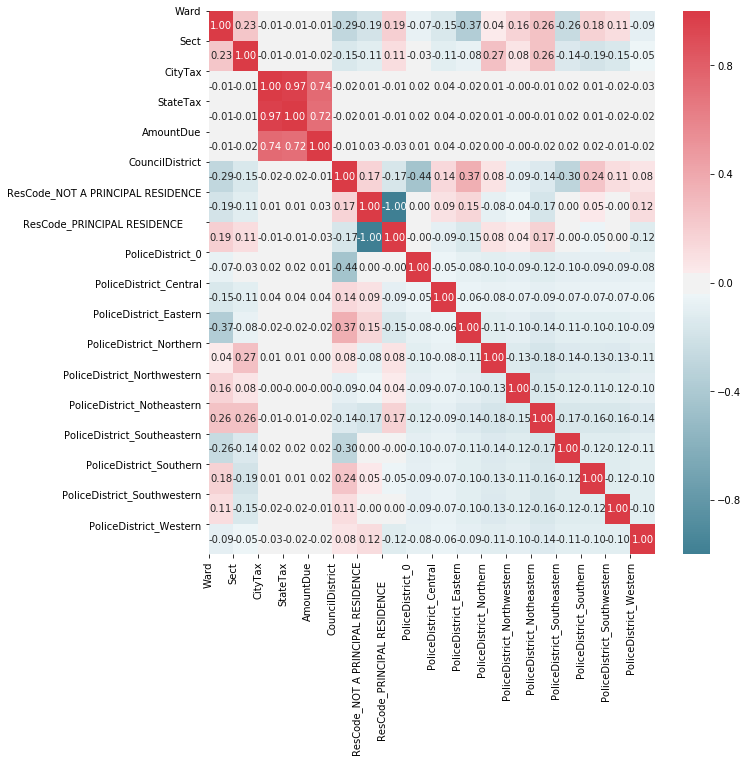

In [40]:
corr = df_res.corr()
fig, ax = plt.subplots(figsize=(10, 10))
colormap = sns.diverging_palette(220, 10, as_cmap=True)
sns.heatmap(corr, cmap=colormap, annot=True, fmt=".2f")
plt.xticks(range(len(corr.columns)), corr.columns);
plt.yticks(range(len(corr.columns)), corr.columns)
plt.show()

In [41]:
from  sklearn.ensemble import RandomForestClassifier
RFC = RandomForestClassifier()
RFmodel = RFC.fit(TrainData,TrainLabel)
AccuracyTrain=RFmodel.score(TrainData,TrainLabel)
AccuracyTest=RFmodel.score(TestData,TestLabel)
print("Accuracy for Vacant train Data :",AccuracyTrain*100)
print("Accuracy for vacant test data :",AccuracyTest*100)
f = list(RFmodel.feature_importances_)

Accuracy for Vacant train Data : 97.20503838413951
Accuracy for vacant test data : 95.17461116002181


In [47]:
importanceList = []
for key in f:
    importanceList.append(key*100)

In [48]:
df_res.columns

Index(['Ward', 'Sect', 'CityTax', 'StateTax', 'AmountDue', 'CouncilDistrict',
       'ResCode_NOT A PRINCIPAL RESIDENCE',
       'ResCode_PRINCIPAL RESIDENCE      ', 'PoliceDistrict_0',
       'PoliceDistrict_Central', 'PoliceDistrict_Eastern',
       'PoliceDistrict_Northern', 'PoliceDistrict_Northwestern',
       'PoliceDistrict_Notheastern', 'PoliceDistrict_Southeastern',
       'PoliceDistrict_Southern', 'PoliceDistrict_Southwestern',
       'PoliceDistrict_Western'],
      dtype='object')

In [50]:
columnsList = list(df_res.columns)
# print(columnsList)
# print(importanceList)

['Ward', 'Sect', 'CityTax', 'StateTax', 'AmountDue', 'CouncilDistrict', 'ResCode_NOT A PRINCIPAL RESIDENCE', 'ResCode_PRINCIPAL RESIDENCE      ', 'PoliceDistrict_0', 'PoliceDistrict_Central', 'PoliceDistrict_Eastern', 'PoliceDistrict_Northern', 'PoliceDistrict_Northwestern', 'PoliceDistrict_Notheastern', 'PoliceDistrict_Southeastern', 'PoliceDistrict_Southern', 'PoliceDistrict_Southwestern', 'PoliceDistrict_Western']
[5.871382245246165, 9.929456802674142, 27.187548816893948, 23.92124134284293, 18.811142107533108, 4.7970828150550355, 2.707197526654223, 1.9902805542616715, 0.37036276096001963, 0.23980049643083645, 0.6878674753480228, 0.4460420490270881, 0.33456737523911695, 0.26376879165965483, 0.24419424280230523, 0.4856724405126718, 0.38895831033759976, 1.3234338465214623]


In [54]:
for i in range(len(columnsList)):
    print(columnsList[i] + " ---> " + str(importanceList[i]))

Ward ---> 5.871382245246165
Sect ---> 9.929456802674142
CityTax ---> 27.187548816893948
StateTax ---> 23.92124134284293
AmountDue ---> 18.811142107533108
CouncilDistrict ---> 4.7970828150550355
ResCode_NOT A PRINCIPAL RESIDENCE ---> 2.707197526654223
ResCode_PRINCIPAL RESIDENCE       ---> 1.9902805542616715
PoliceDistrict_0 ---> 0.37036276096001963
PoliceDistrict_Central ---> 0.23980049643083645
PoliceDistrict_Eastern ---> 0.6878674753480228
PoliceDistrict_Northern ---> 0.4460420490270881
PoliceDistrict_Northwestern ---> 0.33456737523911695
PoliceDistrict_Notheastern ---> 0.26376879165965483
PoliceDistrict_Southeastern ---> 0.24419424280230523
PoliceDistrict_Southern ---> 0.4856724405126718
PoliceDistrict_Southwestern ---> 0.38895831033759976
PoliceDistrict_Western ---> 1.3234338465214623


The above shows importance of each column 

In [44]:
from sklearn.neighbors import KNeighborsClassifier
KnnModel = KNeighborsClassifier()
KnnModel.fit(TrainData, TrainLabel)
KnnTrainAccuracy = KnnModel.score(TrainData, TrainLabel)
print("Accuracy of HR Training Data for KNN Algorithm is: ",KnnTrainAccuracy*100)
KnnTestAccuracy = KnnModel.score(TestData, TestLabel)
print("Accuracy of HR Testing Data for KNN Algorithm is: ",KnnTestAccuracy*100)

Accuracy of HR Training Data for KNN Algorithm is:  95.54250204963853
Accuracy of HR Testing Data for KNN Algorithm is:  94.92726281809416
